# Eksploracyjna Analiza Danych - na przykładzie danych uczniów uczących się matematyki

## Cel analizy
Celem tej analizy jest zrozumienie, jakie czynniki demograficzne, społeczne, środowiskowe i związane ze stylem życia wpływają na wyniki uczniów w matematyce. Zbadamy zależności pomiędzy różnymi zmiennymi a oceną końcową z matematyki (`G3`), a także spróbujemy wskazać najważniejsze predyktory sukcesu edukacyjnego.

## Opis zbioru danych
Zbiór danych **Math Students** pochodzi z repozytorium UCI i zawiera szczegółowe informacje na temat:
- **Danych demograficznych**: płeć (`Fedu`), wiek (`age`), adres zamieszkania (`address`), wielkość rodziny (`famsize`), status współzamieszkiwania rodziców (`Pstatus`).
- **Wykształcenia i statusu rodziców**: poziom edukacji matki i ojca (`Medu`, `Fedu`), zawód rodziców (`Mjob`, `Fjob`).
- **Środowiska szkolnego**: czas nauki (`studytime`), liczba niepowodzeń (`failures`), obecność na zajęciach (`absences`), wsparcie edukacyjne (`schoolsup`, `famsup`).
- **Stylu życia i zdrowia**: czas wolny (`freetime`), życie towarzyskie (`goout`), konsumpcja alkoholu (`Dalc`, `Walc`), samoocena stanu zdrowia (`health`).
- **Wyników edukacyjnych**: trzy oceny z matematyki – `G1` (pierwszy okres), `G2` (drugi okres) i `G3` (ocena końcowa).

## Zmienna zależna
- **Główna zmienna zależna**: `G3` (ocena końcowa z matematyki).  
- **Inne istotne zmienne zależne**: `G1`, `G2`, `studytime`, `failures`, `absences`, `health`, `Medu`, `Fedu`, `schoolsup`, `famsup`.

## Hipotezy badawcze

### Główne pytania:
1. Jakie czynniki demograficzne i społeczne wpływają na końcowy wynik w matematyce (`G3`)?
2. Czy czas nauki i dodatkowe wsparcie edukacyjne przekładają się na lepsze oceny?
3. W jakim stopniu styl życia uczniów (zdrowie, czas wolny, picie alkoholu) koreluje z wynikami?

### Poboczne pytania:
1. Czy wyniki różnią się między dziewczętami a chłopcami?
2. Czy uczniowie mieszkający w mieście i na wsi osiągają podobne wyniki?
3. Czy poziom edukacji rodziców ma wyraźny wpływ na sukcesy uczniów?
4. Czy liczba nieobecności jest negatywnie skorelowana z oceną końcową?
5. Jaki jest wpływ poprzednich niepowodzeń na obecną ocenę? 
6. Jak silny jest wpływ ocen `G1` i `G2` na ocenę końcową `G3`?


In [372]:
from imports_bib import *
from import_data import load_kaggle_dataset
from config_data import config
import plotly.express as px

In [373]:
df = load_kaggle_dataset(
    dataset_name=config["dataset_name"],
    zip_file_name=config["zip_file_name"],
    csv_file_name=config["csv_file_name"],
    data_path=config["data_path"]
)

print(df.head())

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/math-students
Pliki w ZIP: ['Math-Students.csv']
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 r

In [374]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [375]:
print(df.describe(include=[np.number]))

              age        Medu        Fedu  traveltime   studytime    failures  \
count  399.000000  399.000000  399.000000  399.000000  399.000000  399.000000   
mean    16.709273    2.761905    2.536341    1.443609    2.035088    0.330827   
std      1.278225    1.096340    1.092716    0.695429    0.835020    0.740655   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.500000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  399.000000  399.000000  399.000000  399.000000  399.000000  399.000000   
mean     3.954887    3.233083    3.097744    1.476190    2.288221    3.558897   
std      0.898335    0.9941

In [376]:
print(df.shape)
print(df.duplicated().sum())

(399, 33)
0


In [377]:
unique = pd.DataFrame({
    "Liczba unikalnych": {col: df[col].nunique() for col in df.columns},
    "Przykładowe wartości": {col: df[col].unique()[:5] for col in df.columns}
})

print(f"\nLiczba unikalnych: {unique}")


Liczba unikalnych:             Liczba unikalnych                         Przykładowe wartości
school                      2                                     [GP, MS]
sex                         2                                       [F, M]
age                         8                         [18, 17, 15, 16, 19]
address                     2                                       [U, R]
famsize                     2                                   [GT3, LE3]
Pstatus                     2                                       [A, T]
Medu                        5                              [4, 1, 3, 2, 0]
Fedu                        5                              [4, 1, 2, 3, 0]
Mjob                        5  [at_home, health, other, services, teacher]
Fjob                        5  [teacher, other, services, health, at_home]
reason                      4            [course, other, home, reputation]
guardian                    3                      [mother, father, other]
trave

## Sprawdzanie braków w danych

In [378]:
nulls = df.isnull().sum()
print(nulls)
print(df.duplicated().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
0


### Sprawdzenie rozkładów

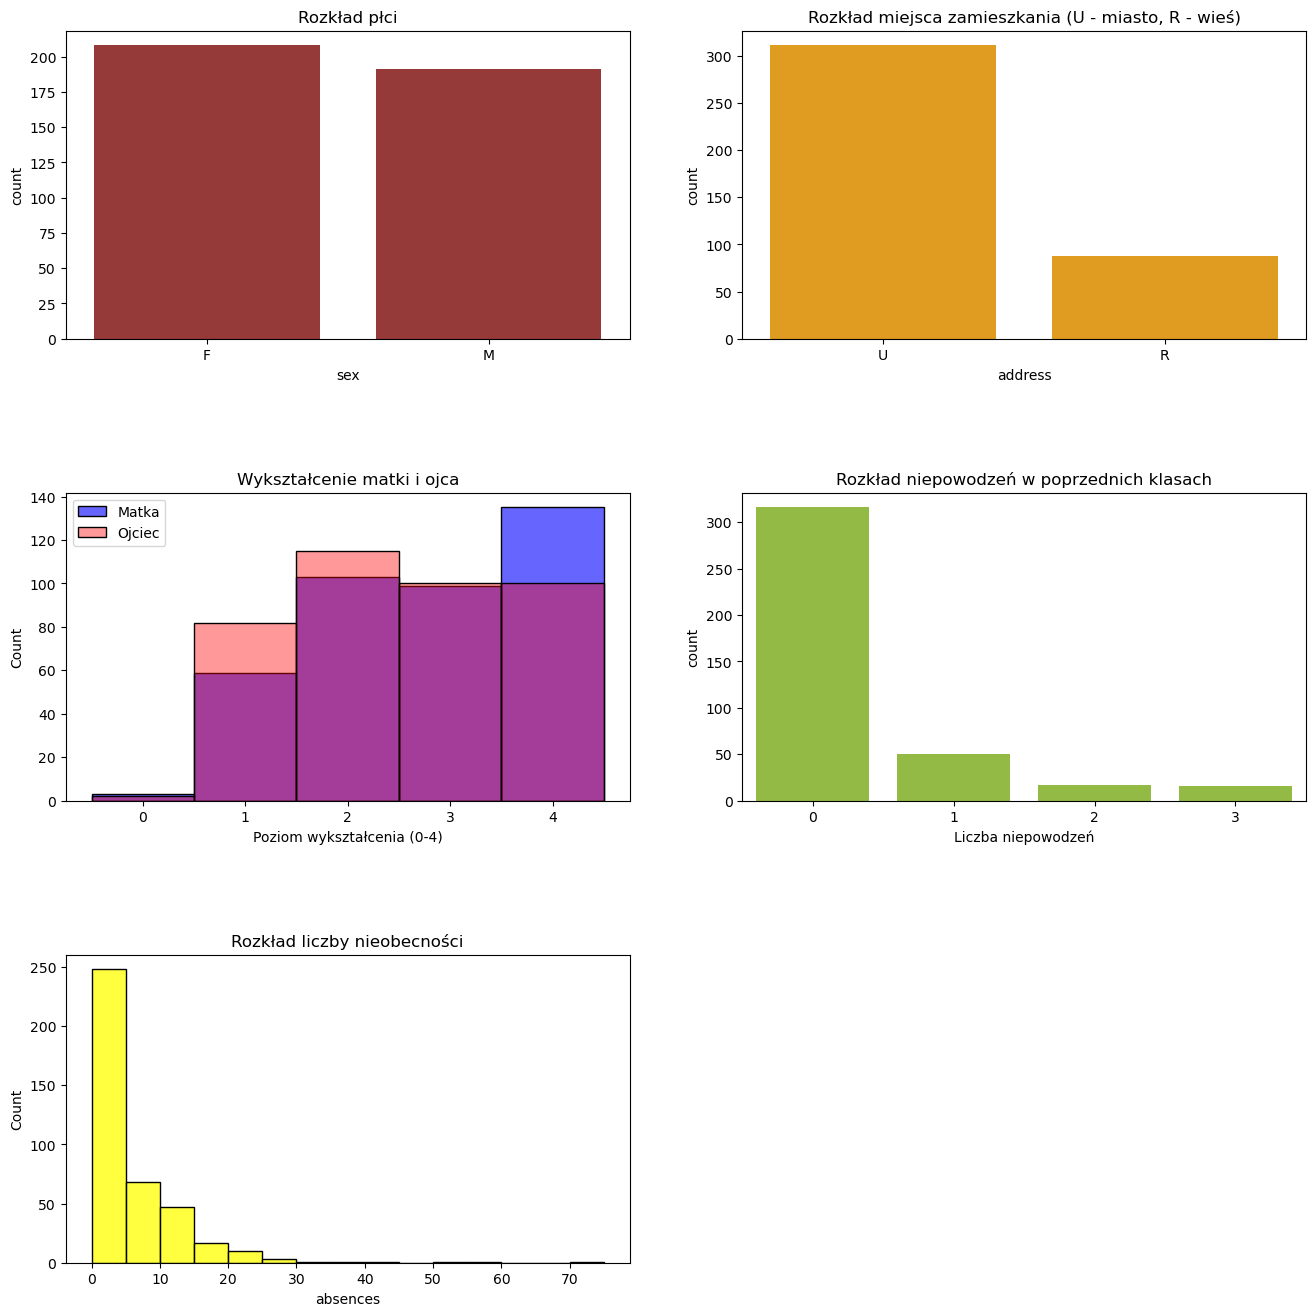

In [407]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Rozkład płci
sns.countplot(x='sex', data=df, color='brown', ax=axes[0, 0])
axes[0, 0].set_title("Rozkład płci")

# Rozkład adresów
sns.countplot(x='address', data=df, color='orange', ax=axes[0, 1])
axes[0, 1].set_title("Rozkład miejsca zamieszkania (U - miasto, R - wieś)")

# Wykształcenie matki i ojca
sns.histplot(df['Medu'], bins=4, color='blue', alpha=0.6, label='Matka', kde=False, discrete=True, ax=axes[1, 0])
sns.histplot(df['Fedu'], bins=4, color='red', alpha=0.4, label='Ojciec', kde=False, discrete=True, ax=axes[1, 0])
axes[1, 0].set_title("Wykształcenie matki i ojca")
axes[1, 0].set_xlabel("Poziom wykształcenia (0-4)")
axes[1, 0].legend(['Matka', 'Ojciec'])

# Rozkład niepowodzeń (failures)
sns.countplot(x='failures', data=df, color='yellowgreen', ax=axes[1, 1])
axes[1, 1].set_title("Rozkład niepowodzeń w poprzednich klasach")
axes[1, 1].set_xlabel("Liczba niepowodzeń")

sns.histplot(df['absences'], bins=15, kde=False, color='yellow', ax=axes[2, 0])
axes[2, 0].set_title("Rozkład liczby nieobecności")

axes[2, 1].axis("off")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Histogram nieobecności



### Sprawdzenie outlierów i zależności

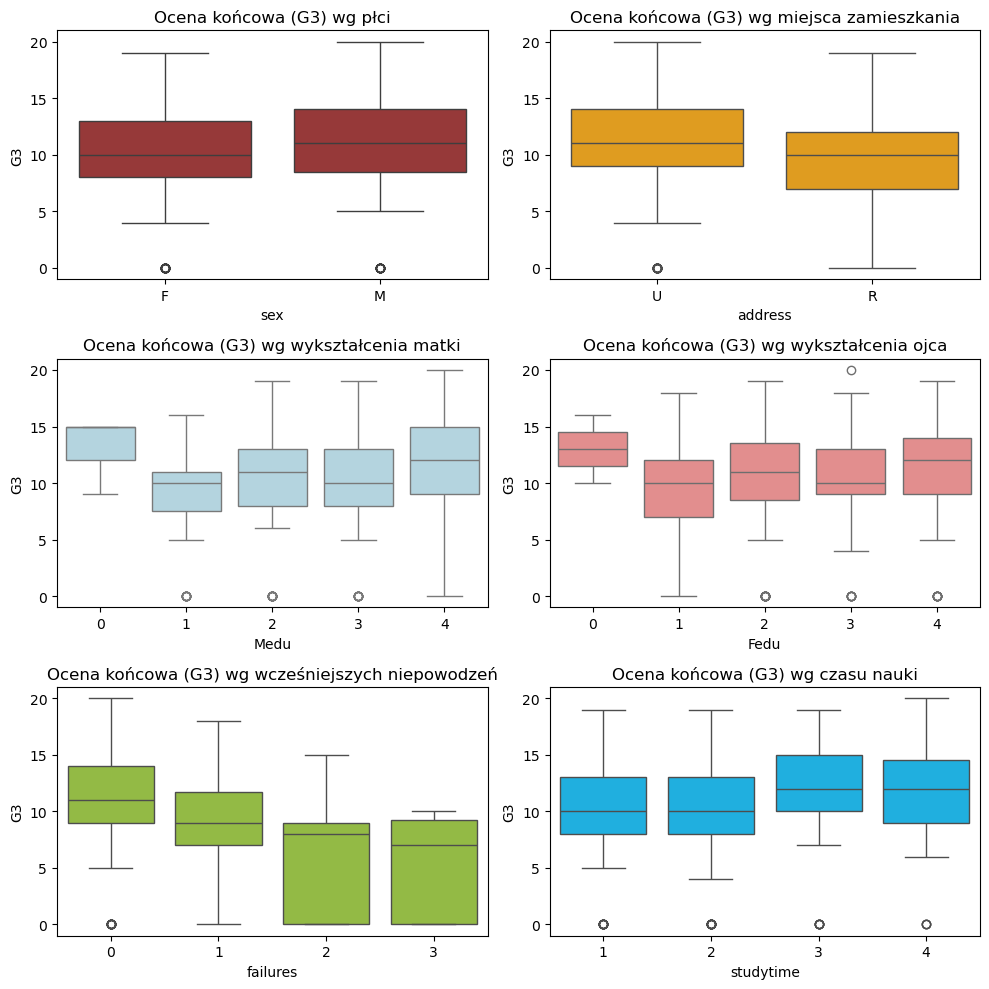

In [445]:

# Boxplot oceny końcowej wg płci i miejsca zamieszkania
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.boxplot(x='sex', y='G3', data=df, ax=axes[0, 0], color='brown')
axes[0, 0].set_title("Ocena końcowa (G3) wg płci")

sns.boxplot(x='address', y='G3', data=df, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Ocena końcowa (G3) wg miejsca zamieszkania")

sns.boxplot(x='Medu', y='G3', data=df, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title("Ocena końcowa (G3) wg wykształcenia matki")

sns.boxplot(x='Fedu', y='G3', data=df, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title("Ocena końcowa (G3) wg wykształcenia ojca")

sns.boxplot(x='failures', y='G3', data=df, ax=axes[2, 0], color='yellowgreen')
axes[2, 0].set_title("Ocena końcowa (G3) wg wcześniejszych niepowodzeń")

sns.boxplot(x='studytime', y='G3', data=df, ax=axes[2, 1], color='deepskyblue')
axes[2, 1].set_title("Ocena końcowa (G3) wg czasu nauki")

plt.tight_layout()
plt.show()


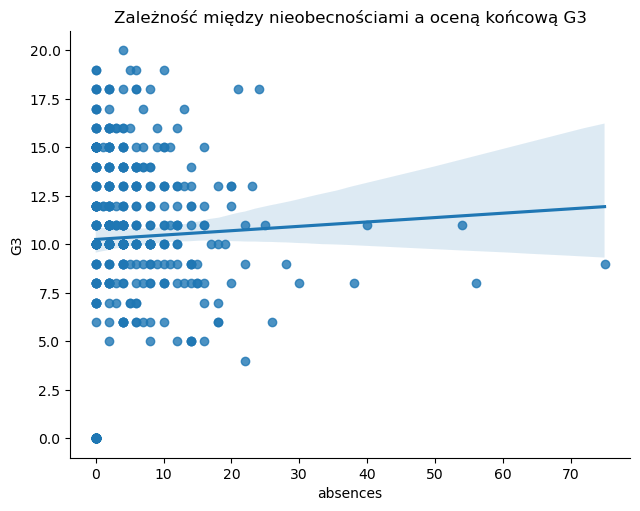

Korelacja Pearsona: 0.03938096353396908 p-wartość: 0.43276406758627106
Korelacja Spearmana: 0.035186652563385955 p-wartość: 0.483387398289296


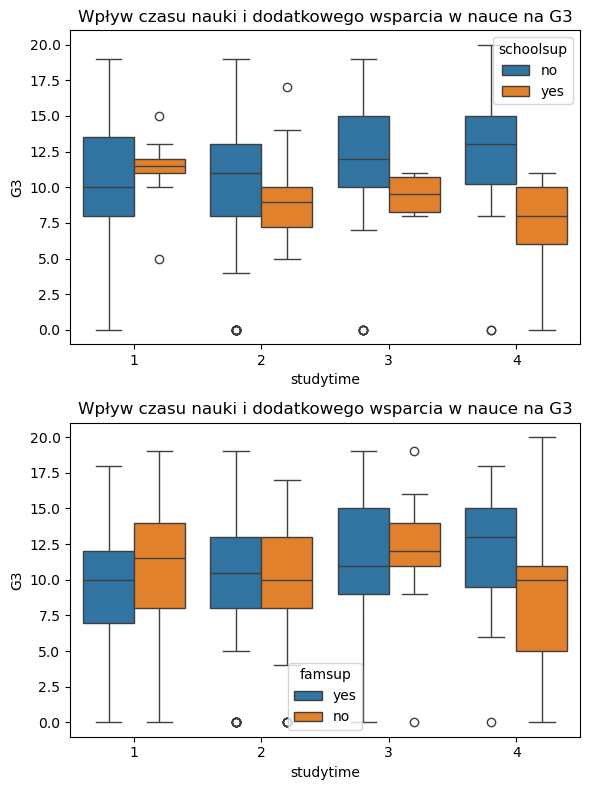

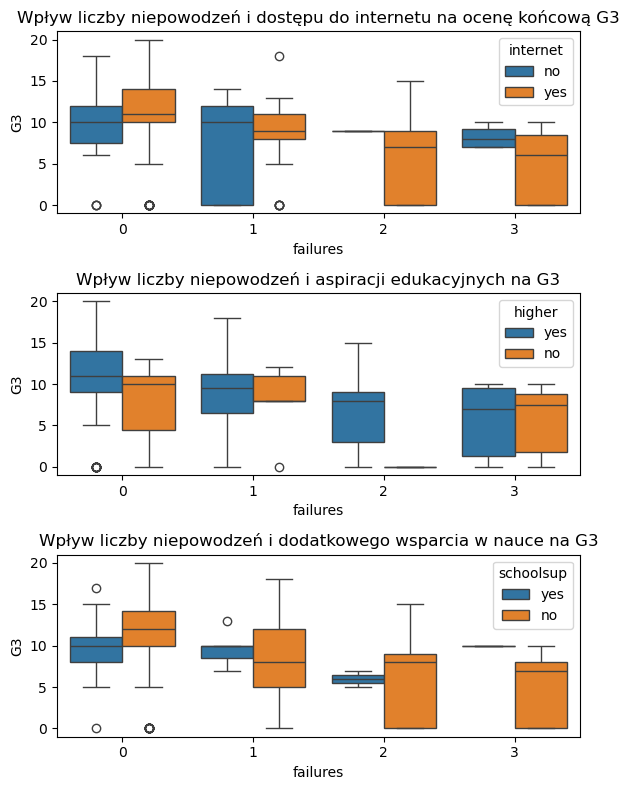

In [ ]:
sns.lmplot(data=df, x="absences", y="G3", height=5, aspect=1.3)
plt.title("Zależność między nieobecnościami a oceną końcową G3")
plt.show()

corr, pval = pearsonr(df["absences"], df["G3"])
print("Korelacja Pearsona:", corr, "p-wartość:", pval)

corr_s, pval_s = spearmanr(df["absences"], df["G3"])
print("Korelacja Spearmana:", corr_s, "p-wartość:", pval_s)

fig, axes = plt.subplots(2, 1, figsize=(6, 8))
sns.boxplot(data=df, x="studytime", y="G3", hue="schoolsup", ax=axes[0])
axes[0].set_title("Wpływ czasu nauki i dodatkowego wsparcia w nauce na G3")

sns.boxplot(data=df, x="studytime", y="G3", hue="famsup", ax=axes[1])
axes[1].set_title("Wpływ czasu nauki i wsparcia od rodziny na G3")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(6, 8))
# Wpływ niepowodzeń i internetu
sns.boxplot(data=df, x="failures", y="G3", hue="internet", ax=axes[0])
axes[0].set_title("Wpływ liczby niepowodzeń i dostępu do internetu na ocenę końcową G3")

# Wpływ niepowodzeń i aspiracji edukacyjnych
sns.boxplot(data=df, x="failures", y="G3", hue="higher", ax=axes[1])
axes[1].set_title("Wpływ liczby niepowodzeń i aspiracji edukacyjnych na G3")

# Wpływ liczby niepowodzeń i dodatkowego wsparcia w nauce
sns.boxplot(data=df, x="failures", y="G3", hue="schoolsup", ax=axes[2])
axes[2].set_title("Wpływ liczby niepowodzeń i dodatkowego wsparcia w nauce na G3")

plt.tight_layout()
plt.show()



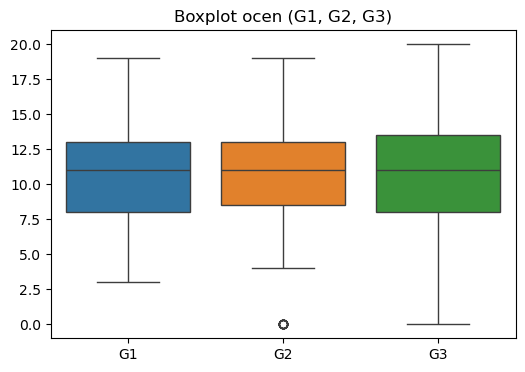

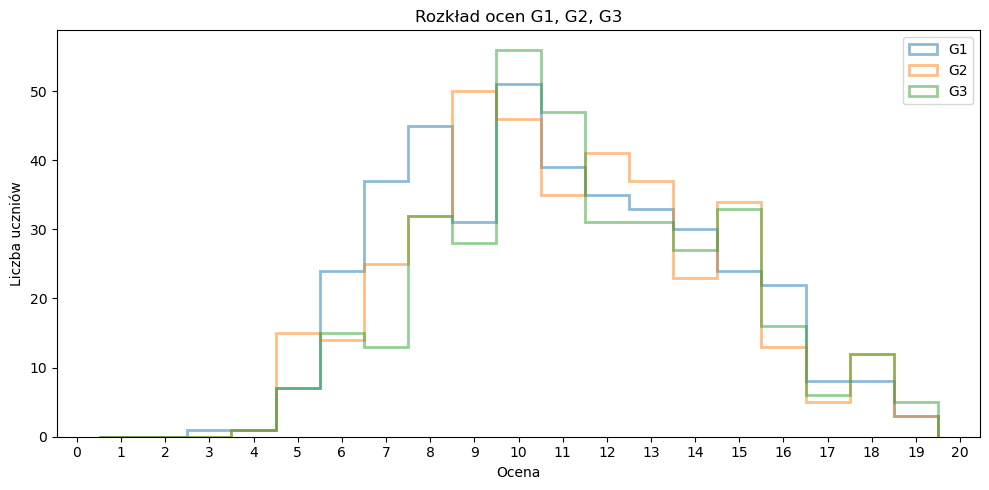

Korelacja Pearsona G1-G3: PearsonRResult(statistic=0.80269470740994, pvalue=3.825731545224979e-91)
Korelacja Spearmana G1-G3: SignificanceResult(statistic=0.8778727082003823, pvalue=5.1709878565344694e-129)
Korelacja Pearsona G2-G3: PearsonRResult(statistic=0.905304239724968, pvalue=1.0465716926888539e-149)
Korelacja Spearmana G2-G3: SignificanceResult(statistic=0.9572133962970999, pvalue=6.697966834553191e-216)


In [448]:

# Boxplot dla ocen - sprawdzenie outlierów
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['G1','G2','G3']])
plt.title("Boxplot ocen (G1, G2, G3)")
plt.show()


plt.figure(figsize=(10, 5))
bins = np.arange(0.5, 20.5, 1)

plt.hist(df['G1'], bins=bins, histtype='step', linewidth=2, color='C0', alpha=0.5, label='G1')
plt.hist(df['G2'], bins=bins, histtype='step', linewidth=2, color='C1', alpha=0.5, label='G2')
plt.hist(df['G3'], bins=bins, histtype='step', linewidth=2, color='C2', alpha=0.5, label='G3')
plt.title("Rozkład ocen G1, G2, G3")
plt.xlabel("Ocena")
plt.ylabel("Liczba uczniów")
plt.xticks(range(0, 21))
plt.legend()
plt.tight_layout()
plt.show()

print("Korelacja Pearsona G1-G3:", pearsonr(df['G1'], df['G3']))
print("Korelacja Spearmana G1-G3:", spearmanr(df['G1'], df['G3']))

print("Korelacja Pearsona G2-G3:", pearsonr(df['G2'], df['G3']))
print("Korelacja Spearmana G2-G3:", spearmanr(df['G2'], df['G3']))


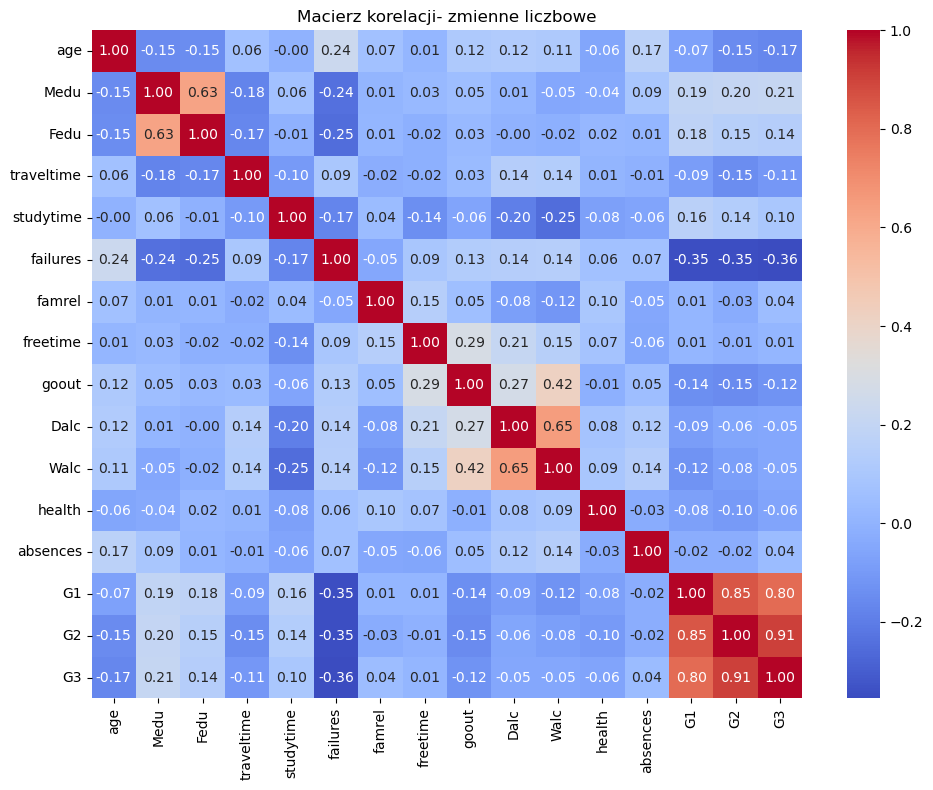

In [384]:
# Korelacja zmiennych liczbowych
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", fmt=".2f", annot=True)
plt.title("Macierz korelacji- zmienne liczbowe")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Zamiana danych kategorycznych na numeryczne (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Korelacja dla wszystkich zmiennych numerycznych + binarnych kategorycznych (po one-hot encoding)
corr_matrix = df_encoded.corr()

fig = px.imshow(
    corr_matrix,
    color_continuous_scale="RdBu_r",  # reversed color scale
    zmin=-1, zmax=1,
    title="Macierz korelacji- zmienne liczbowe i kategoryczne"
)
fig.update_layout(
    width=600,
    height=600,
    xaxis=dict(tickfont=dict(size=7)),
    yaxis=dict(tickfont=dict(size=7)),
    title=dict(font=dict(size=15))
)
fig.show()


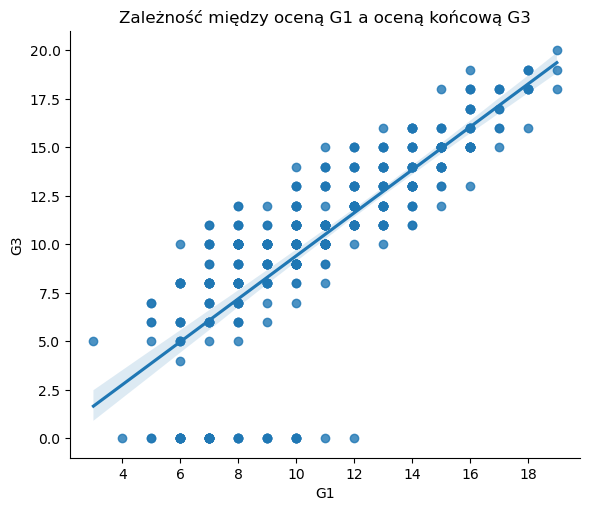

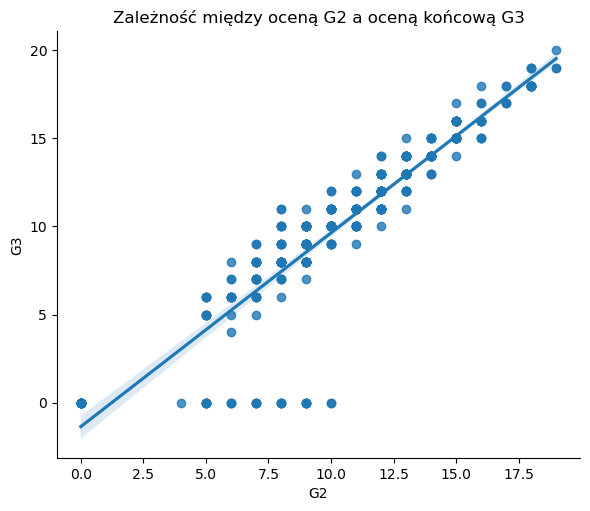

In [385]:

# Scatterplot G1 vs G3
sns.lmplot(data=df, x="G1", y="G3", height=5, aspect=1.2)
plt.title("Zależność między oceną G1 a oceną końcową G3")
plt.show()

# Scatterplot G2 vs G3
sns.lmplot(data=df, x="G2", y="G3", height=5, aspect=1.2)
plt.title("Zależność między oceną G2 a oceną końcową G3")
plt.show()

# Wykres punktowy G1 vs G2 z rozmiarem punktów wg liczby niepowodzeń i kolorem wg G3
fig = px.scatter(
    df,
    x='G1',
    y='G2',
    color='G3',
    size=df['failures'] + 1,  # Dodanie stałej, aby uniknąć zerowych rozmiarów
    title='Zależności między G1, G2 oraz G3  (rozmiar punktów wg liczby niepowodzeń)',
    opacity=0.4,
    size_max=10,
)

fig.update_traces(textposition='middle center')
fig.show()

## Wnioski

### Główne pytania:
1. **Jakie czynniki demograficzne i społeczne wpływają na końcowy wynik w matematyce (`G3`)?**<br>
Głównym czynnikiem jest tu wykształcenie rodziców. W dużo mniejszym stopniu wpływ ma pochodzenie z miasta czy wsi, oraz płeć. 
2. **Czy czas nauki i dodatkowe wsparcie edukacyjne przekładają się na lepsze oceny?**<br>
Czas nauki istotnie wpływa na lepsze oceny dla osób które nie otrzymują dodatkowego wsparcia edukacyjnego. Co ciekawe osoby, które takie wsparcie otrzymują, dostają gorsze oceny wraz z ilością czasu nauki. 
<!-- 3. **W jakim stopniu styl życia uczniów (zdrowie, czas wolny, picie alkoholu) koreluje z wynikami?**<br> -->


### Poboczne pytania:
1. **Czy wyniki różnią się między dziewczętami a chłopcami?**<br>
Niewielka różnica średnich (chłopcy wyżej) istnieje, jednak nie można powiedzieć, że płeć determinuje wyniki w sposób jednoznaczny.
2. **Czy uczniowie mieszkający w mieście i na wsi osiągają podobne wyniki?**<br>
Tak, choć różnice są niewielkie. Uczniowie z miast mają wyższe średnie, ale efekt nie jest silny.
3. **Czy poziom edukacji rodziców ma wyraźny wpływ na sukcesy uczniów?**<br>
Tak, widać tu trend: im wyższe wykształcenie rodziców (poza sytuacją z brakiem wykształcenia), tym wyższe średnie G3. Dodatkowo uczniowie rodziców z brakiem wykształcenia średnio osiągają najwyższe wyniki w G3. 
4. **Czy liczba nieobecności jest negatywnie skorelowana z oceną końcową?**<br>
Nie widać wyraźnego wpływu nieobecności na ocenę końcową. <br>
Korelacja Pearsona: 0.039 p-wartość: 0.43<br>
Korelacja Spearmana: 0.035 p-wartość: 0.48<br>
5. **Jaki jest wpływ poprzednich niepowodzeń na obecną ocenę?**<br>
Niepowodzenia mają silny negatywny wpływ. Im więcej było niepowodzeń poprzednio, tym większa szansa, że uczeń dostanie gorszą ocenę G3. 
6. **Jak silny jest wpływ ocen `G1` i `G2` na ocenę końcową `G3`?**<br>
Jest on bardzo silny. <br>
Korelacja Pearsona G1-G3: statistic=0.80, pvalue=3.83<br>
Korelacja Spearmana G1-G3: statistic=0.88, pvalue=5.17<br>
Korelacja Pearsona G2-G3: statistic=0.91, pvalue=1.05<br>
Korelacja Spearmana G2-G3: statistic=0.96, pvalue=6.70<br>